1. How much revenue does the business generated and how many purchases were made over each month recorded?

In [ ]:
SELECT
  FORMAT_DATE('%Y-%m', date) AS by_month,
  COUNT(datetime) AS purchases,
  ROUND(SUM(money), 2) AS revenue
FROM `sql-study-409813.Test.coffee`
GROUP BY FORMAT_DATE('%Y-%m', date)

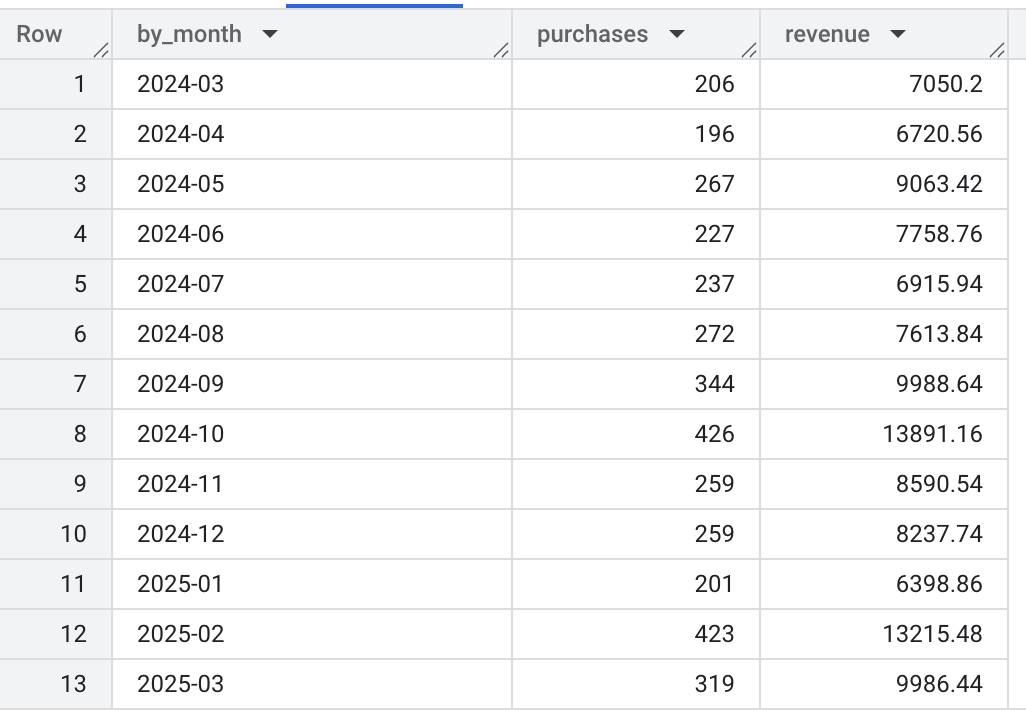

2. What type of coffee was the most popular each month?

In [ ]:
WITH coffee_types AS (
  SELECT
    FORMAT_DATE('%Y-%m', date) AS by_month,
    coffee_name,
    COUNT(coffee_name) AS purchases
  FROM `sql-study-409813.Test.coffee`
  GROUP BY FORMAT_DATE('%Y-%m', date), coffee_name
)
SELECT
  by_month,
  coffee_name
FROM (
  SELECT
    by_month,
    coffee_name,
    purchases,
    ROW_NUMBER() OVER(PARTITION BY by_month ORDER BY purchases DESC) AS ranks
  FROM coffee_types
) AS coffee_ranks
WHERE ranks = 1
GROUP BY 
  by_month,
  coffee_name
ORDER BY by_month

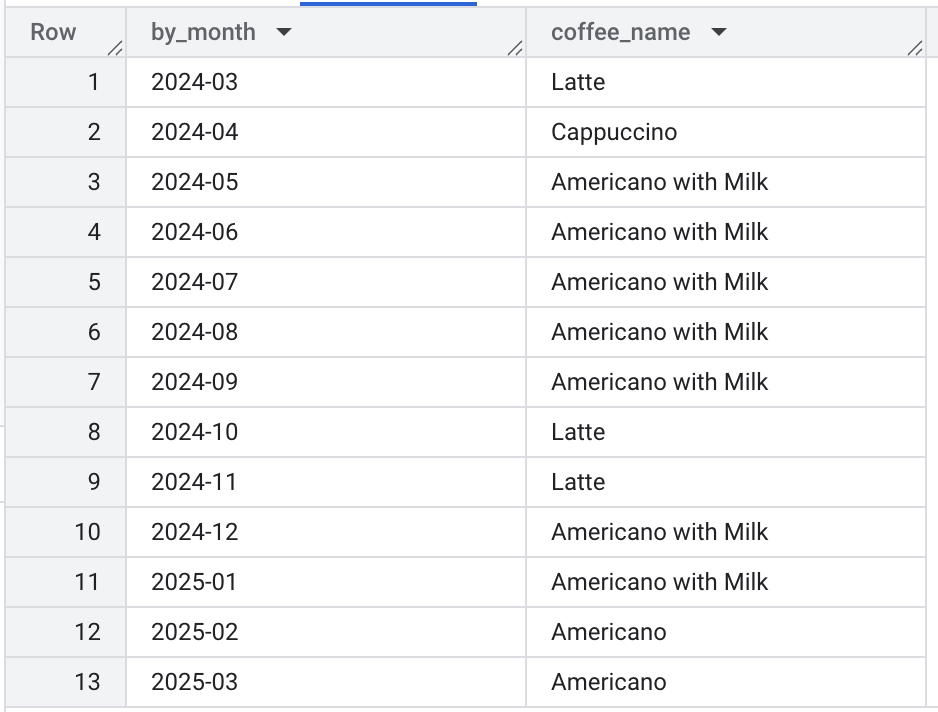

3. How much does the business make per day on average?

In [ ]:
WITH cte AS (
  SELECT
    ROUND(SUM(money), 2) AS revenue,
    DATE_DIFF(MAX(date), MIN(date), DAY) AS days
  FROM `sql-study-409813.Test.coffee`
)
SELECT
  ROUND(revenue / days, 2) AS revenue_per_day
FROM cte

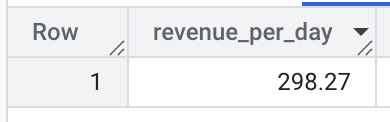

4. What percent do cash transactions constitute?

In [ ]:
WITH cte_1 AS (
  SELECT
    COUNT(cash_type) AS total_transactions
  FROM `sql-study-409813.Test.coffee`
),
cte_2 AS (
  SELECT
    COUNT(cash_type) AS cash_transactions
  FROM `sql-study-409813.Test.coffee`
  WHERE cash_type = 'cash'
)
SELECT
  ROUND(100 * cash_transactions / total_transactions, 2) AS cash_transactions
FROM cte_1, cte_2


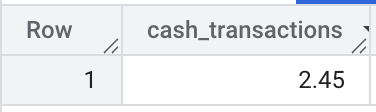

5. What is the popularity of each coffee type (by purchases) over the whole period?

In [ ]:
SELECT
  coffee_name,
  COUNT(coffee_name) AS purchases
FROM `sql-study-409813.Test.coffee`
GROUP BY coffee_name
ORDER BY purchases DESC

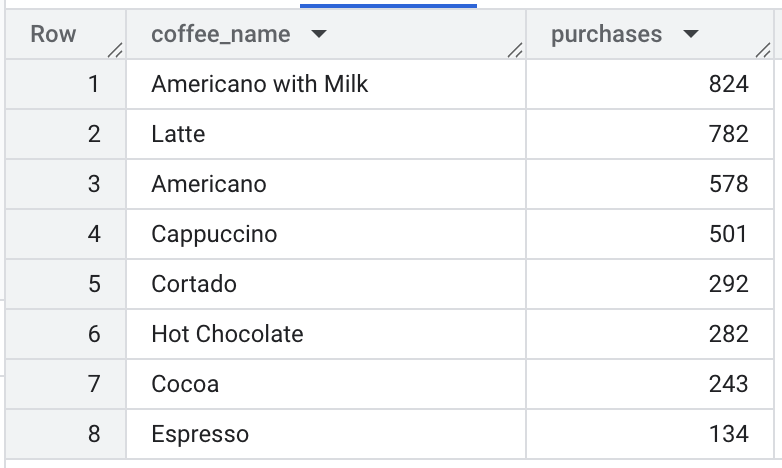

6. What is the most favourite type of coffee of the best customer?

In [ ]:
WITH cte_1 AS (
  SELECT
    card,
    coffee_name,
    COUNT(card) AS purchases
  FROM `sql-study-409813.Test.coffee`
  WHERE cash_type = 'card'
  GROUP BY card, coffee_name
),
cte_2 AS (
  SELECT
    card,
    coffee_name,
    purchases,
    ROW_NUMBER() OVER(PARTITION BY card ORDER BY purchases DESC) AS ranks
  FROM cte_1
)
SELECT
  card,
  coffee_name
FROM cte_2
WHERE 
  ranks = 1
  AND card IN (
    SELECT
      card,
    FROM `sql-study-409813.Test.coffee`
    WHERE cash_type = 'card'
    GROUP BY card
    ORDER BY COUNT(card) DESC
    LIMIT 1
  )

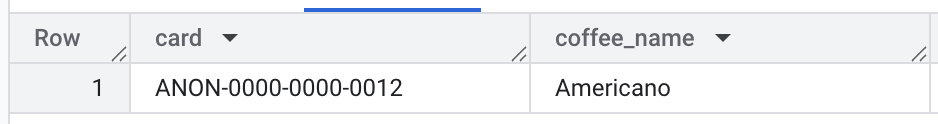